In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "data/",
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode="categorical")

Found 4514 files belonging to 2 classes.
Using 3612 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "data/",
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode="categorical")

Found 4514 files belonging to 2 classes.
Using 902 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Healthy', 'Tumor']


In [6]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(2, activation='sigmoid'))

In [7]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 2)                1026      
 pper)                                                           
                                                                 
Total params: 24,637,826
Trainable params: 1,050,114
Non-trainable params: 23,587,712
____________________________________

In [8]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy', 'Precision', 'Recall'])

In [9]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
113/113 [==============================] - 128s 1s/step - loss: 0.2856 - accuracy: 0.8945 - precision: 0.8890 - recall: 0.8917 - val_loss: 0.2016 - val_accuracy: 0.9246 - val_precision: 0.9224 - val_recall: 0.9224
Epoch 2/10
113/113 [==============================] - 118s 1s/step - loss: 0.1030 - accuracy: 0.9621 - precision: 0.9642 - recall: 0.9623 - val_loss: 0.1092 - val_accuracy: 0.9634 - val_precision: 0.9645 - val_recall: 0.9645
Epoch 3/10
113/113 [==============================] - 113s 999ms/step - loss: 0.0738 - accuracy: 0.9748 - precision: 0.9745 - recall: 0.9740 - val_loss: 0.1161 - val_accuracy: 0.9623 - val_precision: 0.9581 - val_recall: 0.9623
Epoch 4/10
113/113 [==============================] - 118s 1s/step - loss: 0.0339 - accuracy: 0.9920 - precision: 0.9922 - recall: 0.9920 - val_loss: 0.0961 - val_accuracy: 0.9678 - val_precision: 0.9690 - val_recall: 0.9690
Epoch 5/10
113/113 [==============================] - 123s 1s/step - loss: 0.0195 - accuracy: 0.9

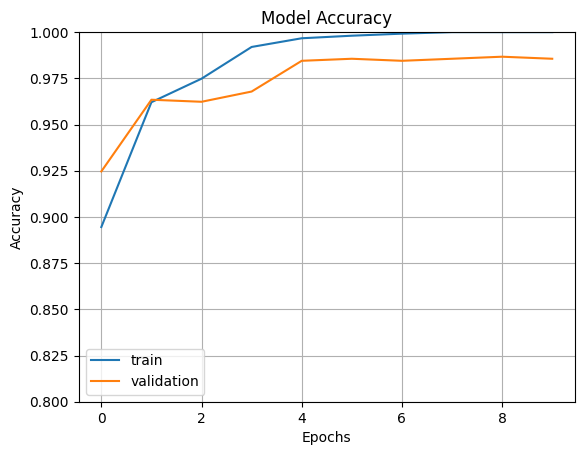

In [10]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.8,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

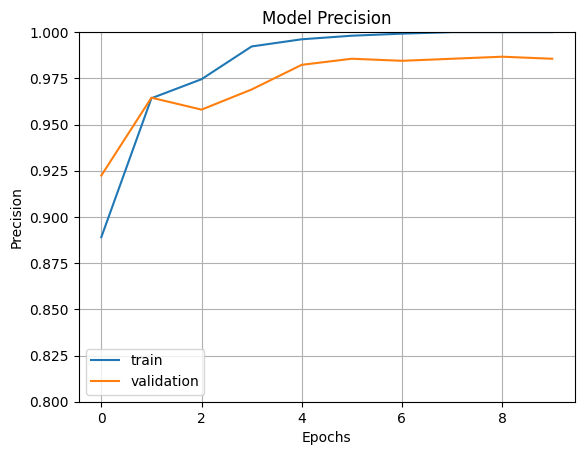

In [11]:
fig1 = plt.gcf()
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.axis(ymin=0.8,ymax=1)
plt.grid()
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

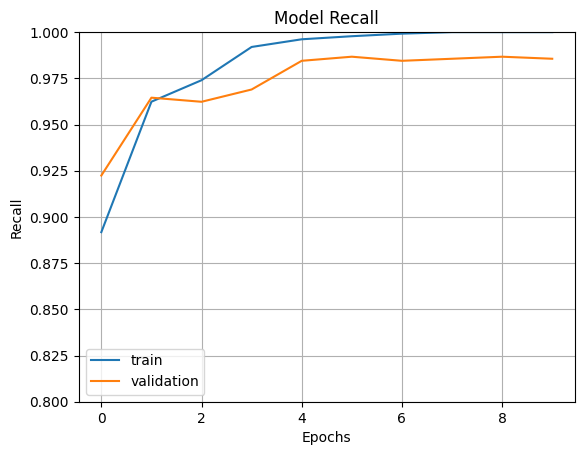

In [12]:
fig1 = plt.gcf()
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.axis(ymin=0.8,ymax=1)
plt.grid()
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

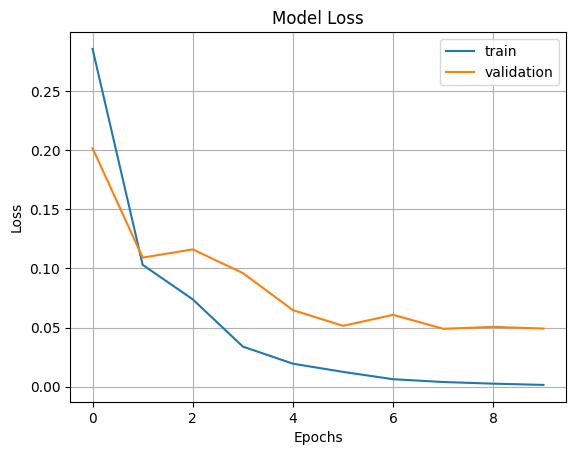

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [14]:
import pathlib
data_dir = pathlib.Path("data/")
tumors = list(data_dir.glob('Tumor/*'))

In [15]:
import cv2
image=cv2.imread(str(tumors[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [16]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 1s 736ms/step
[[2.2753296e-05 9.9996185e-01]]


In [17]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is Tumor


In [18]:
history.history["val_accuracy"][-1]

0.9855875968933105

In [19]:
history.history["val_precision"][-1]

0.9855875968933105

In [20]:
history.history["val_recall"][-1]

0.9855875968933105

In [21]:
resnet_model.save('ResNetModel')

INFO:tensorflow:Assets written to: ResNetModel\assets


INFO:tensorflow:Assets written to: ResNetModel\assets
